<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Allgemeine-Info" data-toc-modified-id="Allgemeine-Info-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Allgemeine Info</a></span></li><li><span><a href="#Pandas-Auswirkungen" data-toc-modified-id="Pandas-Auswirkungen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pandas Auswirkungen</a></span></li><li><span><a href="#Parallelisierung-(dask.delayed)" data-toc-modified-id="Parallelisierung-(dask.delayed)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parallelisierung (dask.delayed)</a></span><ul class="toc-item"><li><span><a href="#Inkrementierung-und-Addition" data-toc-modified-id="Inkrementierung-und-Addition-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Inkrementierung und Addition</a></span></li><li><span><a href="#For-Schleife" data-toc-modified-id="For-Schleife-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>For-Schleife</a></span></li></ul></li><li><span><a href="#Großes-Array" data-toc-modified-id="Großes-Array-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Großes Array</a></span></li><li><span><a href="#DataFrame-+-Beispiel" data-toc-modified-id="DataFrame-+-Beispiel-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>DataFrame + Beispiel</a></span><ul class="toc-item"><li><span><a href="#Vorbereitung" data-toc-modified-id="Vorbereitung-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Vorbereitung</a></span></li><li><span><a href="#Berechnung" data-toc-modified-id="Berechnung-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Berechnung</a></span></li></ul></li></ul></div>

# Imports 

In [1]:
%run Imports.ipynb

All good


# Allgemeine Info

- Bei dem Versuch ein Datenset mit bspw. 100 GB an Daten in ein Pandas DataFrame zu laden wird es zu einer Fehlermeldung kommen (MemoryError). <br><br> 
- Eine Möglichkeit wäre Apache Spark, bei der man eine Python-artige API mit PySpark hinbekommt. Es besitzt aber sein eigenes Ökosystem (ML Tools, SQL Datenbank, Parallel Computing) => Inklusiv gebaut, so dass man dort all seine Arbeit erledigen kann. Nachteil dabei ist dass es auf Scala basiert (Bugs machen es schwer es zu debugen) und es ist nicht mehr die gewohnte Python Umgebung (Tools wie Sci-kit Learn, Keras, TensorFlow, PyTorch, ... entfallen). <br><br>
- Um diesen Nachteilen entgegenzuwirken heißt die Lösung Dask. Das Ziel davon ist es nicht ein komplett eigenes Ökosystem aufzubauen, sondern gute Synergien mit anderen Python Bibliotheken zu haben. Dadurch erlangen diese Bibliotheken mehr Fähigkeiten mit Hilfe von parallelen Computing und Skalierbarkeit.<br><br>
- Dask wird verwendet für große Dateien (Bspw. 100 GB). 

# Pandas Auswirkungen

In [47]:
pd.set_option("display.max_columns", 2)

# Die Auswirkungen bei Pandas seinen Optionen haben Auswirkungen auf Dask

In [41]:
data = [{'A': 10, 'B': 20, 'C':30}, {'x':100, 'y': 200, 'z': 300},
       {'x':100, 'y': 200, 'z': 300},{'x':100, 'y': 200, 'z': 300}]

test_pd_df = pd.DataFrame(data=data)

# Pandas DataFrame erzeugen und mit Werten befüllen

In [48]:
test_pd_df

# Sind nur zwei Spalten sichtbar (Wegen Einstellung oben)

,A,...,z
0,10.0,...,NaN
1,NaN,...,300.0
2,NaN,...,300.0
3,NaN,...,300.0


In [49]:
test_dask_df = dask.dataframe.from_pandas(data = test_pd_df, npartitions=3)

# Konvertierung von einem Pandas DataFrame in ein Dask DataFrame

In [51]:
test_dask_df.head()

C:\Users\marce\anaconda3\lib\site-packages\dask\dataframe\core.py:6560: UserWarning: Insufficient elements for `head`. 5 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,A,...,z
0,10.0,...,NaN
1,NaN,...,300.0


In [52]:
pd.set_option("display.max_columns", None)

# None = Alle

In [53]:
test_dask_df.head()

C:\Users\marce\anaconda3\lib\site-packages\dask\dataframe\core.py:6560: UserWarning: Insufficient elements for `head`. 5 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,A,B,C,x,y,z
0,10.0,20.0,30.0,NaN,NaN,NaN
1,NaN,NaN,NaN,100.0,200.0,300.0


# Parallelisierung (dask.delayed)

## Inkrementierung und Addition

In [2]:
def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time

# Ohne Dask

x = inc(1)
y = inc(2)
z = add(x, y)

Wall time: 3 s


Die delayed Funktion soll als Decorator wie folgt verwendet werden:<br><br>

@delayed<br>
def inc(x):<br>
    &emsp;&ensp;&nbsp;sleep(1)<br>
     &emsp;&ensp;&nbsp;return x + 1<br><br>

@delayed<br>
def add(x, y):<br>
     &emsp;&ensp;&nbsp;sleep(1)<br>
     &emsp;&ensp;&nbsp;return x + y<br><br>
    
Aber da die ursprünglichen Funktionen zum Vergleich beibehalten werden sollen, werden diese direkt aufgerufen.

In [4]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

Wall time: 0 ns



**Dies wurde sofort ausgeführt, da noch nichts wirklich passiert ist.**<br><br>
Das z-Objekt ist ein lazy Dealayed Objekt. Dieses Objekt enthält alles, was für die Berechnung des Endergebnisses benötigt wird, einschließlich der Verweise auf alle erforderlichen Funktionen, ihre Eingaben und ihre Beziehung zueinander.


In [5]:
z

Delayed('add-d7e43019-6ef8-414d-9a3c-c008c3dc4a6a')

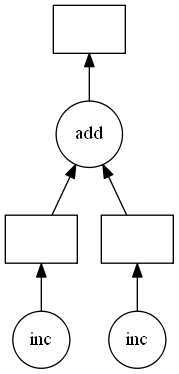

In [6]:
z.visualize()

In [7]:
%%time

z.compute()

Wall time: 2 s


5

## For-Schleife

In [8]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
%%time

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)
print(total)

44
Wall time: 8 s


In [16]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

Wall time: 972 µs


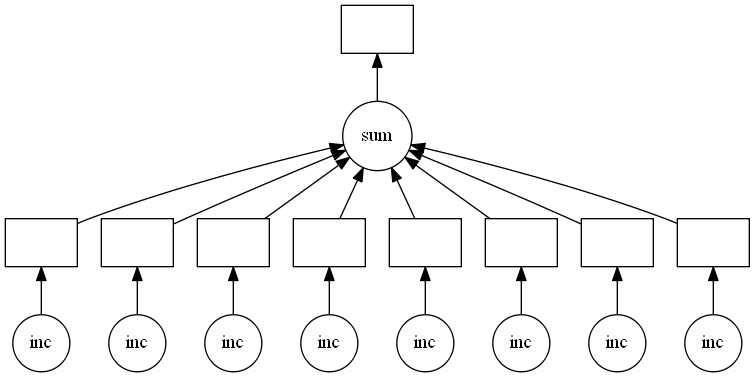

In [17]:
total.visualize()

In [19]:
%%time

total.compute()

Wall time: 1 s


44

# Großes Array

In [5]:
a = da.random.randint(10,100,10000000).reshape(100000,100)
a

dask.array<reshape, shape=(100000, 100), dtype=int32, chunksize=(100000, 100), chunktype=numpy.ndarray>

In [6]:
a.compute()

array([[44, 18, 83, ..., 94, 75, 32],
       [31, 63, 39, ..., 14, 21, 71],
       [55, 70, 13, ..., 19, 73, 13],
       ...,
       [73, 73, 37, ..., 59, 18, 73],
       [55, 23, 32, ..., 27, 61, 12],
       [20, 41, 90, ..., 67, 84, 11]])

# DataFrame + Beispiel

Pandas ist ideal für tabellarische Datensätze, die in den Speicher passen. Dask wird nützlich, wenn der zu analysierende Datensatz größer ist als der Arbeitsspeicher des Rechners. dask.dataframe skaliert auf Datensätze, die viel größer als der Arbeitsspeicher sind.<br><br>

Das Modul dask.dataframe implementiert ein blockiertes paralleles DataFrame-Objekt, das eine große Teilmenge des Pandas DataFrame nachahmt. Ein Dask DataFrame besteht aus vielen speicherinternen Pandas DataFrames, die entlang des Index getrennt sind. Eine Operation auf einem Dask DataFrame löst viele Pandas-Operationen auf den zugehörigen Pandas DataFrames aus, und zwar auf eine Weise, die die potenzielle Parallelität und die Speicherbeschränkungen berücksichtigt.<br><br>

Beispiel mit einem Auszug von Flügen in den USA über mehrere Jahre. Diese Daten sind spezifisch für Flüge von den drei Flughäfen im Gebiet von New York City.

## Vorbereitung

In [2]:
# Download des "NYC Flights" Datensatz in das workspace

print("- Downloading NYC Flights dataset... ", end='', flush=True)
url = "https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz"
filename, headers = urllib.request.urlretrieve(url, 'nycflights.tar.gz')
print("Done!", flush=True)

- Downloading NYC Flights dataset... Done!


In [3]:
# Entpacken der .csv-Dateien aus der tar-Datei
with tarfile.open(filename, mode='r:gz') as flights:
            flights.extractall('data/dask/nycflights/')

In [57]:
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]})

df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**Achtung die Repräsentation des Dataframe-Objekts enthält keine Daten!** <br><br> Dask hat gerade genug getan, um den Anfang der ersten Datei zu lesen und die Spaltennamen und dtypes abzuleiten.

In [58]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,81,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,81,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,81,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,81,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,81,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [60]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [61]:
# Bei Spalten mit gemischten Datentypen muss der richtige Typ abgeleitet werden
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [62]:
df.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,256.0,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,256.0,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,256.0,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,256.0,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,256.0,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


## Berechnung

Wir wollen das Maximum der Spalte DepDelay berechnen. Mit Pandas würde man eine Schleife über jede Datei ziehen, um die einzelnen Maxima zu finden, und dann das endgültige Maximum über alle einzelnen Maxima ermitteln. Ziemlich umständlich.<br><br>

Mit dask.dataframe kann man pandas-ähnlichen Code schreiben, der parallel auf Datensätzen arbeitet, die größer als der Speicher sind:

In [63]:
%time df.DepDelay.max().compute()

Wall time: 6.21 s


1435.0

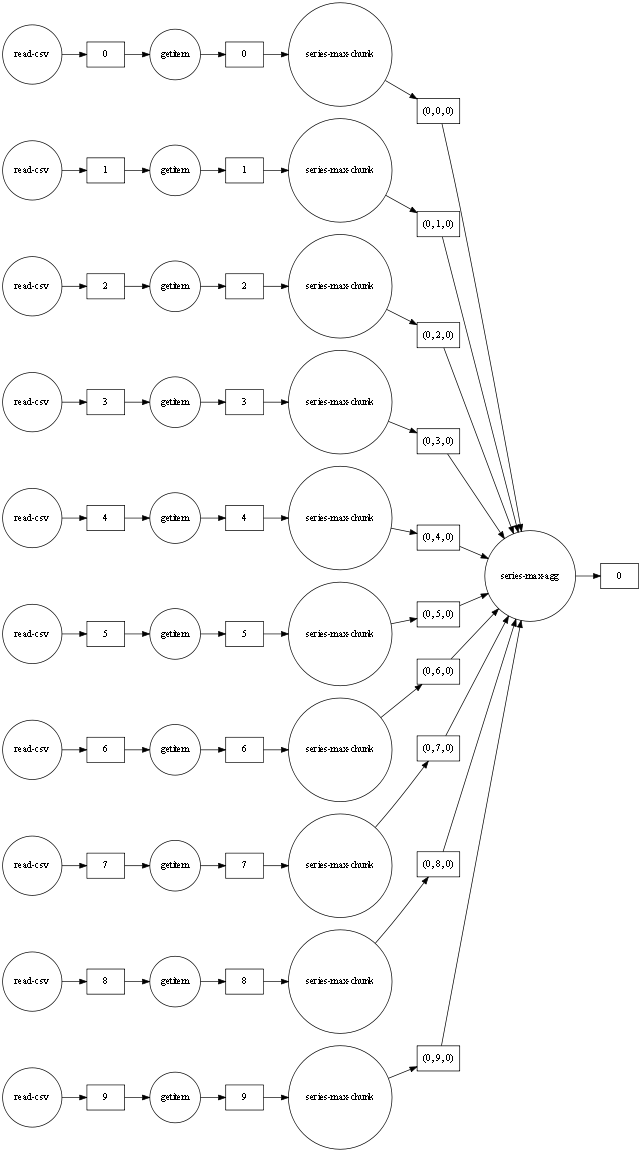

In [64]:
df.DepDelay.max().visualize(rankdir="LR", size="12, 12!")